In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os

# اضافه کردن پوشه src به مسیر سیستم برای دسترسی به ماژول‌ها
sys.path.append(os.path.abspath('../src'))

<div dir="rtl" style="font-family: 'Tahoma', 'Arial'; line-height: 1.8; text-align: justify; padding: 40px; border: 1px solid #d1d9e6; border-radius: 15px; background-color: #ffffff; color: #2c3e50; margin: 20px auto; max-width: 850px; box-shadow: 0 4px 20px rgba(0,0,0,0.05);">

<h1 style="color: #1a5f7a; text-align: center; border-bottom: 3px solid #1a5f7a; padding-bottom: 15px; margin-bottom: 35px; font-weight: bold;">فاز اول: تحلیل مسئله و آماده‌سازی داده‌ها</h1>

<div style="background-color: #f8fafd; padding: 15px; border-right: 8px solid #1a5f7a; border-radius: 4px; margin-bottom: 30px;">
<h2 style="color: #159895; margin-top: 0; font-size: 1.5em;">۱. تعریف علمی مسئله و اهداف (Problem Definition)</h2>
<p style="font-size: 1.1em;">مطابق با <strong>مسیر شماره ۸ (Chatbots)</strong>، این پروژه بر طراحی یک هسته هوشمند برای درک زبان طبیعی (NLU) تمرکز دارد. مسئله اصلی، تبدیل عبارات محاوره‌ای کاربران به ساختارهای قابل فهم برای سیستم‌های مدیریتی است.</p>
</div>

<h3 style="color: #1a5f7a; margin-right: 10px;">۱.۱. تشریح متدولوژی مسئله</h3>
<p style="margin: 0 15px 20px 15px;">
این پروژه از منظر یادگیری ماشین، یک سیستم ترکیبی است که دو وظیفه زیر را به صورت همزمان دنبال می‌کند:
</p>
<ul style="list-style-type: none; padding-right: 20px;">
<li style="margin-bottom: 15px;">
<span style="color: #159895; font-weight: bold;">● دسته‌بندی قصد (Intent Classification):</span>
نگاشت متن ورودی به یکی از ۲۷ کلاس هدف (Target). این یک مسئله <i>Multi-class Classification</i> است که چالش اصلی آن، شباهت معنایی زیاد بین برخی دسته‌هاست.
</li>
<li style="margin-bottom: 15px;">
<span style="color: #159895; font-weight: bold;">● استخراج موجودیت (Entity Extraction):</span>
شناسایی و جداسازی بخش‌های کلیدی متن (مانند Order ID) که به عنوان ورودی برای توابع سیستمی استفاده می‌شوند.
</li>
</ul>

<h3 style="color: #1a5f7a; margin-right: 10px;">۱.۲. مشخصات فنی داده‌های ورودی (Bitext Dataset)</h3>
<p style="margin: 0 15px 20px 15px;">دیتاست انتخاب شده شامل ۲۷,۳۳۷ نمونه است که ساختار آن به شرح زیر در مدل‌سازی لحاظ می‌گردد:</p>

<div style="padding: 0 15px;">
<table style="width: 100%; border-collapse: collapse; background-color: #fff; border: 1px solid #e0e0e0;">
<thead>
<tr style="background-color: #f2f7f9; color: #1a5f7a;">
<th style="padding: 12px; border: 1px solid #e0e0e0; text-align: center;">ستون</th>
<th style="padding: 12px; border: 1px solid #e0e0e0; text-align: center;">نقش عملیاتی</th>
<th style="padding: 12px; border: 1px solid #e0e0e0; text-align: center;">نوع داده</th>
</tr>
</thead>
<tbody>
<tr>
<td style="padding: 10px; border: 1px solid #e0e0e0; text-align: center; font-weight: bold;">instruction</td>
<td style="padding: 10px; border: 1px solid #e0e0e0; text-align: center;">ورودی اصلی (Feature)</td>
<td style="padding: 10px; border: 1px solid #e0e0e0; text-align: center;">Text / String</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #e0e0e0; text-align: center; font-weight: bold;">intent</td>
<td style="padding: 10px; border: 1px solid #e0e0e0; text-align: center;">برچسب هدف (Label)</td>
<td style="padding: 10px; border: 1px solid #e0e0e0; text-align: center;">Categorical</td>
</tr>
</tbody>
</table>
</div>

<h3 style="color: #1a5f7a; margin-top: 35px; margin-right: 10px;">۱.۳. اهداف کمی و معیارهای موفقیت</h3>
<p style="margin: 0 15px 20px 15px;">برای ارزیابی دقیق عملکرد مدل، اهداف عددی زیر تعیین شده است:</p>

<div style="display: flex; gap: 20px; flex-wrap: wrap; justify-content: center; margin-top: 20px;">
<div style="background: #ffffff; padding: 15px; border-radius: 8px; width: 220px; text-align: center; border: 2px solid #159895; box-shadow: 0 2px 10px rgba(0,0,0,0.03);">
<div style="font-size: 0.9em; color: #7f8c8d; margin-bottom: 5px;">مدل پایه (Baseline)</div>
<div style="font-size: 1.6em; color: #1a5f7a; font-weight: bold;">Accuracy > 80%</div>
</div>
<div style="background: #ffffff; padding: 15px; border-radius: 8px; width: 220px; text-align: center; border: 2px solid #1a5f7a; box-shadow: 0 2px 10px rgba(0,0,0,0.03);">
<div style="font-size: 0.9em; color: #7f8c8d; margin-bottom: 5px;">مدل نهایی (Transformer)</div>
<div style="font-size: 1.6em; color: #1a5f7a; font-weight: bold;">F1-Score > 90%</div>
</div>
</div>

<p style="margin-top: 30px; padding: 15px; background-color: #fff9f0; border-left: 5px solid #f39c12; font-size: 0.95em; color: #856404; border-radius: 4px;">
<strong>نکته کلیدی:</strong> با توجه به وجود کلاس‌های مشابه، اولویت ارزیابی با معیار <strong>Weighted F1-Score</strong> خواهد بود تا توازن در تشخیص تمامی قصدها تضمین شود.
</p>

</div>

<div dir="rtl" style="font-family: 'Tahoma', 'Arial'; line-height: 1.8; text-align: justify; padding: 40px; border: 1px solid #d1d9e6; border-radius: 15px; background-color: #ffffff; color: #2c3e50; margin: 20px auto; max-width: 850px; box-shadow: 0 4px 20px rgba(0,0,0,0.05);">

<h2 style="color: #159895; border-bottom: 2px solid #1a5f7a; padding-bottom: 10px;">۲. تحلیل اکتشافی داده‌ها (EDA)</h2>

<h3 style="color: #1a5f7a;">۲.۱. معرفی شناسنامه دیتاست</h3>
<p>دیتاست مورد استفاده در این پروژه، <strong>Bitext Customer Service Dataset</strong> نسخه v11 است که به صورت تخصصی برای آموزش مدل‌های درک زبان طبیعی در حوزه پشتیبانی مشتریان طراحی شده است.</p>
<ul style="list-style-type: square; padding-right: 20px;">
<li><strong>منبع:</strong> پلتفرم Kaggle / Bitext NLP Lab</li>
<li><strong>تعداد کل نمونه‌ها:</strong> ۲۷,۳۳۷ سطر</li>
<li><strong>نوع داده:</strong> متنی (Textual) همراه با برچسب‌های طبقه‌بندی (Categorical)</li>
<li><strong>تعداد کلاس‌های هدف (Intent):</strong> ۲۷ نوع قصد مختلف</li>
<li><strong>زبان:</strong> انگلیسی</li>
</ul>

<h3 style="color: #1a5f7a;">۲.۲. تحلیل آماری و بصری (Visual Analytics)</h3>
<p>در این بخش، با استفاده از کتابخانه‌های Matplotlib و Seaborn، شش جنبه مختلف از داده‌ها را برای درک بهتر ساختار و چالش‌های موجود (مانند عدم تعادل کلاس‌ها) تحلیل می‌کنیم.</p>

<div style="background-color: #f8fafd; padding: 20px; border-radius: 10px; border: 1px solid #e0e0e0; margin-top: 20px;">
<h4 style="color: #1a5f7a; margin-top: 0;">لیست نمودارهای ترسیم شده:</h4>
<ol>
<li><strong>توزیع Intentها:</strong> بررسی توازن میان ۲۷ کلاس هدف.</li>
<li><strong>توزیع دسته‌های کلان (Categories):</strong> تحلیل فراوانی حوزه‌هایی مثل Order، Refund و...</li>
<li><strong>هیستوگرام طول جملات:</strong> بررسی تعداد کلمات در هر Instruction برای تعیین حداکثر طول در مدل‌های Transformer.</li>
<li><strong>ابر کلمات (Word Cloud):</strong> نمایش کلمات کلیدی که بیشترین تأثیر را در تشخیص قصد دارند.</li>
<li><strong>تحلیل بای‌گرام‌ها (Bigrams):</strong> بررسی جفت‌کلمات متداول (مانند "cancel order").</li>
<li><strong>بررسی مقادیر مفقوده (Missing Values):</strong> اطمینان از سلامت و کامل بودن دیتاست.</li>
</ol>
</div>

<h3 style="color: #1a5f7a; margin-top: 30px;">۲.۳. نمونه داده‌های تصادفی</h3>
<p>برای درک بهتر ماهیت جملات، چند نمونه از داده‌های خام در جدول زیر نمایش داده شده است:</p>

<table style="width: 100%; border-collapse: collapse; margin-top: 10px; font-size: 0.9em;">
<tr style="background-color: #f2f7f9; color: #1a5f7a;">
<th style="border: 1px solid #ddd; padding: 8px;">متن ورودی (Instruction)</th>
<th style="border: 1px solid #ddd; padding: 8px;">قصد (Intent)</th>
</tr>
<tr>
<td style="border: 1px solid #ddd; padding: 8px;">"How do I get a refund for my last purchase?"</td>
<td style="border: 1px solid #ddd; padding: 8px; color: #159895;">get_refund</td>
</tr>
<tr>
<td style="border: 1px solid #ddd; padding: 8px;">"I want to change the delivery address for order #445"</td>
<td style="border: 1px solid #ddd; padding: 8px; color: #159895;">edit_shipping_address</td>
</tr>
</table>

</div>

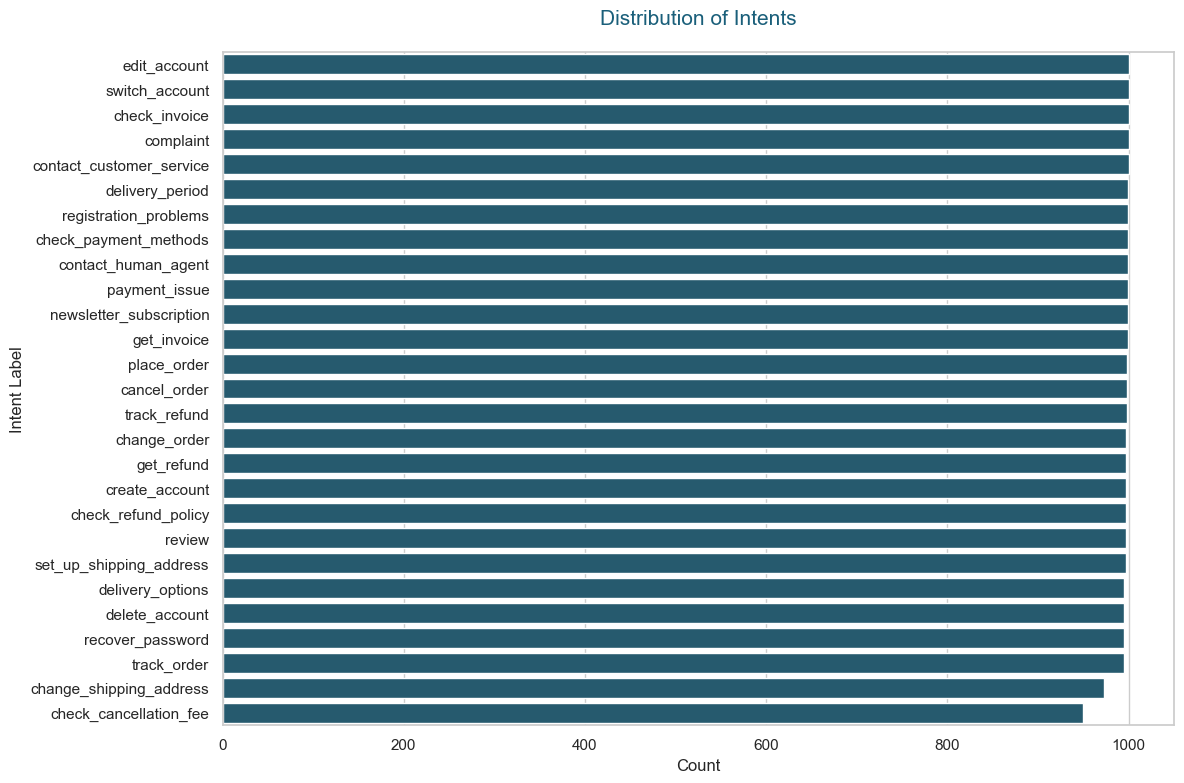

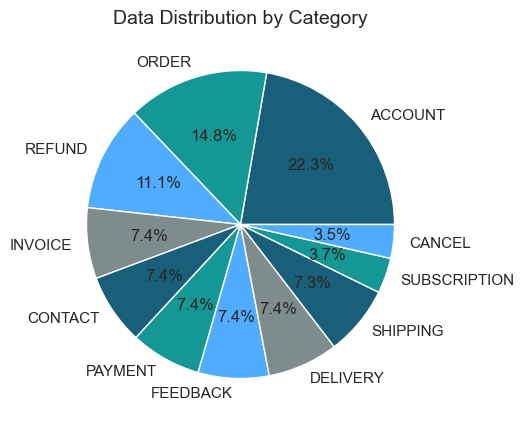

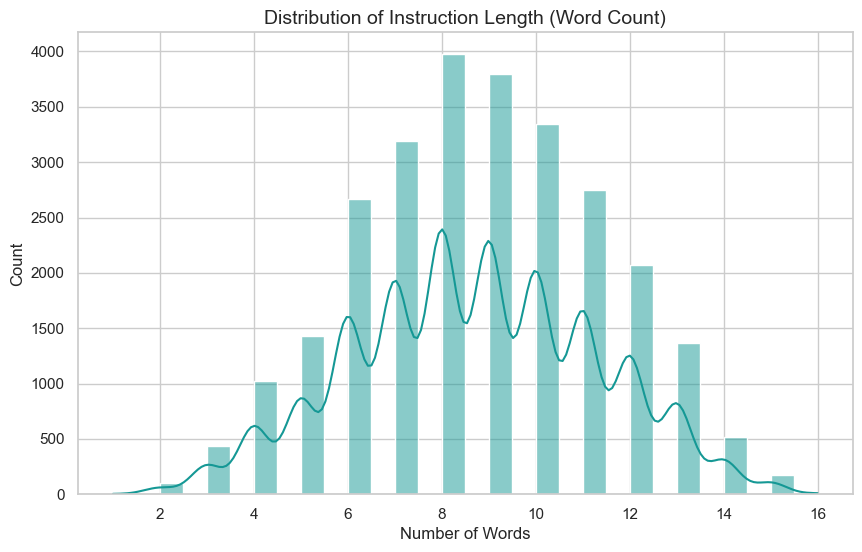

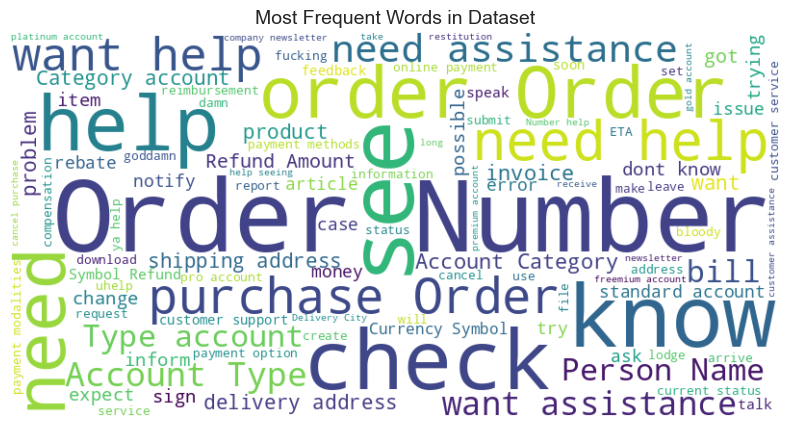

flags          0
instruction    0
category       0
intent         0
response       0
word_count     0
dtype: int64


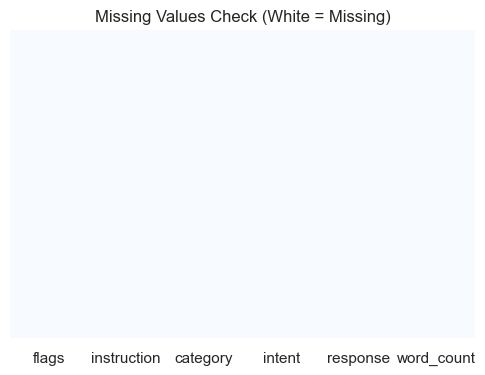

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3780\848045471.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='crest')


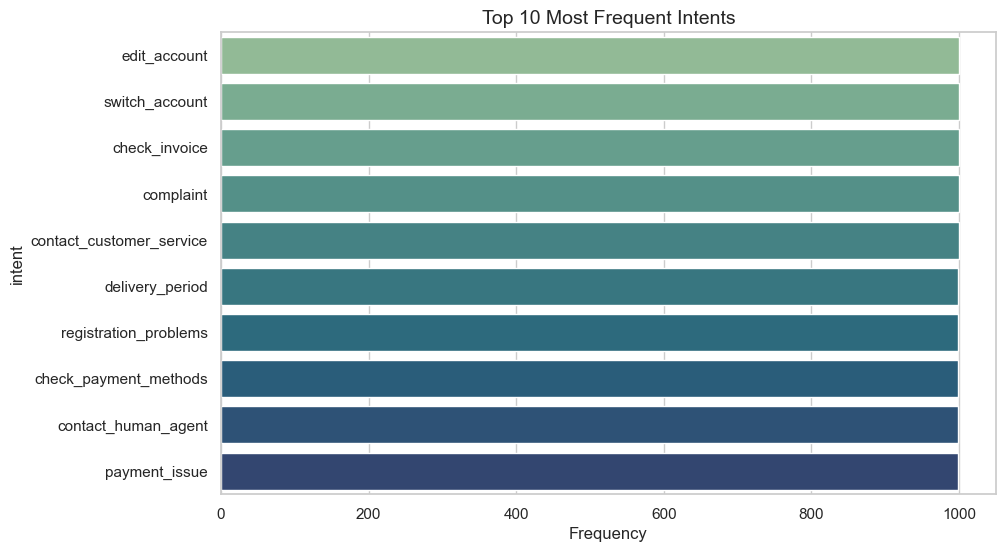

Dataset Statistics:
Total Samples: 26872
Total Intents: 27
Average Words per Sentence: 8.69


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os

# 1. بارگذاری داده‌ها (آدرس را بر اساس سیستم خودت تنظیم کن)
df = pd.read_csv('../data/raw/Bitext_Sample_Customer_Support_Training_Dataset_27K_responses-v11.csv')

# تنظیمات استایل بصری (تم روشن و متالیک)
sns.set_theme(style="whitegrid")
primary_color = "#1a5f7a"
secondary_color = "#159895"

# ایجاد پوشه برای ذخیره نمودارها (طبق ساختار درختی)
os.makedirs('../results/charts', exist_ok=True)

# --- نمودار ۱: توزیع Intentها (بسیار مهم برای بررسی Imbalance) ---
plt.figure(figsize=(12, 8))
order = df['intent'].value_counts().index
sns.countplot(data=df, y='intent', order=order, color=primary_color)
plt.title('Distribution of Intents', fontsize=15, pad=20, color=primary_color)
plt.xlabel('Count')
plt.ylabel('Intent Label')
plt.tight_layout()
plt.savefig('../results/charts/01_intent_dist.png')
plt.show()

# --- نمودار ۲: توزیع Categories ---
plt.figure(figsize=(8, 5))
df['category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=[primary_color, secondary_color, '#4facfe', '#7f8c8d'])
plt.title('Data Distribution by Category', fontsize=14)
plt.ylabel('')
plt.savefig('../results/charts/02_category_pie.png')
plt.show()

# --- نمودار ۳: طول جملات (Word Count Distribution) ---
df['word_count'] = df['instruction'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True, color=secondary_color)
plt.title('Distribution of Instruction Length (Word Count)', fontsize=14)
plt.xlabel('Number of Words')
plt.savefig('../results/charts/03_sentence_length.png')
plt.show()

# --- نمودار ۴: ابر کلمات (Word Cloud) ---
all_text = " ".join(df['instruction'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap='viridis', max_words=100).generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Dataset', fontsize=14)
plt.savefig('../results/charts/04_wordcloud.png')
plt.show()

# --- نمودار ۵: تحلیل مقادیر مفقوده (Missing Values) ---
print(df.isnull().sum())
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')
plt.title('Missing Values Check (White = Missing)', fontsize=12)
plt.savefig('../results/charts/05_missing_values.png')
plt.show()

# --- نمودار ۶: ۱۰ قصد پر تکرار (Focus on Top Intents) ---
plt.figure(figsize=(10, 6))
top_10 = df['intent'].value_counts().nlargest(10)
sns.barplot(x=top_10.values, y=top_10.index, palette='crest')
plt.title('Top 10 Most Frequent Intents', fontsize=14)
plt.xlabel('Frequency')
plt.savefig('../results/charts/06_top_intents.png')
plt.show()

# چاپ خلاصه آماری برای گزارش
print("Dataset Statistics:")
print(f"Total Samples: {len(df)}")
print(f"Total Intents: {df['intent'].nunique()}")
print(f"Average Words per Sentence: {df['word_count'].mean():.2f}")

<div dir="rtl" style="font-family: 'Tahoma', 'Arial'; line-height: 1.8; text-align: justify; padding: 40px; border: 1px solid #d1d9e6; border-radius: 15px; background-color: #ffffff; color: #2c3e50; margin: 20px auto; max-width: 850px; box-shadow: 0 4px 20px rgba(0,0,0,0.05);">

<h2 style="color: #159895; border-bottom: 2px solid #1a5f7a; padding-bottom: 10px;">۳. پیش‌پردازش تخصصی متن (NLP Preprocessing)</h2>

<p>برای آماده‌سازی جملات ستون <code>instruction</code> جهت ورود به مدل‌های یادگیری ماشین، یک خط لوله (Pipeline) چند مرحله‌ای طراحی شده است. هدف از این بخش، کاهش نویز و تبدیل متن به فرمتی است که ویژگی‌های معنایی آن برای مدل قابل درک باشد.</p>

<h3 style="color: #1a5f7a;">۳.۱. مراحل تمیزکاری و نرمال‌سازی (Cleaning)</h3>
<p>در این مرحله، تمامی کاراکترهای غیرضروری که بار معنایی ندارند حذف می‌شوند:</p>
<ul style="list-style-type: circle; padding-right: 25px;">
<li><strong>حذف علائم نگارشی (Punctuation):</strong> حذف مواردی مثل (!، ؟، .) برای جلوگیری از ایجاد توکن‌های تکراری.</li>
<li><strong>تبدیل به حروف کوچک (Lowercasing):</strong> یکسان‌سازی کلماتی مثل "Order" و "order".</li>
<li><strong>مدیریت موجودیت‌های خاص:</strong> با توجه به دیتاست Bitext، عباراتی مانند <code>{{Order Number}}</code> شناسایی شده و به توکن‌های استاندارد تبدیل می‌شوند.</li>
</ul>

<h3 style="color: #1a5f7a;">۳.۲. پردازش‌های متنی (Tokenization & Normalization)</h3>
<div style="background-color: #f2f7f9; padding: 20px; border-radius: 10px; margin-bottom: 20px;">
<ul style="padding-right: 15px;">
<li style="margin-bottom: 10px;"><strong>Tokenization:</strong> تجزیه جملات به کلمات سازنده (Tokens).</li>
<li style="margin-bottom: 10px;"><strong>Stopword Removal:</strong> حذف کلمات پر تکرار و بی‌اثر (مانند "the", "is", "at") با استفاده از کتابخانه <code>NLTK</code>.</li>
<li style="margin-bottom: 10px;"><strong>Lemmatization:</strong> تبدیل کلمات به ریشه اصلی (مثلاً تبدیل "ordering" یا "ordered" به "order") برای کاهش ابعاد فضای ویژگی.</li>
</ul>
</div>

<h3 style="color: #1a5f7a;">۳.۳. عددی‌سازی (Vectorization / Encoding)</h3>
<p>از آنجایی که مدل‌های هوش مصنوعی قادر به درک مستقیم متن نیستند، از دو روش برای تبدیل داده‌ها استفاده می‌کنیم:</p>
<ol>
<li><strong>Label Encoding:</strong> تبدیل ۲۷ قصد (Intent) متنی به اعداد صحیح (۰ تا ۲۶).</li>
<li><strong>TF-IDF / Word Embeddings:</strong> تبدیل متن پیش‌پردازش شده به بردارهای عددی برای ورودی مدل Baseline.</li>
</ol>

<p style="margin-top: 25px; border-right: 3px solid #159895; padding-right: 15px; font-style: italic; color: #7f8c8d;">
در فاز دوم، برای مدل پیشرفته Transformer، از Tokenizer اختصاصی مدل <strong>BERT</strong> استفاده خواهد شد که شامل فرآیند WordPiece Encoding است.
</p>

</div>

In [4]:
from preprocessing.cleaner import TextPreprocessor
import pandas as pd

# ۱. خواندن دیتاست خام
raw_data_path = '../data/raw/Bitext_Sample_Customer_Support_Training_Dataset_27K_responses-v11.csv'
df_raw = pd.read_csv(raw_data_path)

# ۲. اجرای پیش‌پردازش
preprocessor = TextPreprocessor()
df_processed, encoder = preprocessor.process_dataframe(df_raw)

# ۳. ذخیره خروجی برای مراحل بعد
os.makedirs('../data/processed', exist_ok=True)
df_processed.to_csv('../data/processed/cleaned_data.csv', index=False)

print("✅ بخش ۳ با موفقیت اجرا شد و داده‌ها تمیز شدند.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


--- Starting Preprocessing ---
Total Unique Classes: 27
--- Preprocessing Finished ---
✅ بخش ۳ با موفقیت اجرا شد و داده‌ها تمیز شدند.


<div dir="rtl" style="font-family: 'Tahoma', 'Arial'; line-height: 1.8; text-align: justify; padding: 40px; border: 1px solid #d1d9e6; border-radius: 15px; background-color: #ffffff; color: #2c3e50; margin: 20px auto; max-width: 850px; box-shadow: 0 4px 20px rgba(0,0,0,0.05);">

<h2 style="color: #159895; border-bottom: 2px solid #1a5f7a; padding-bottom: 10px;">۴. طراحی مدل پایه و انتخاب معماری (Model Baseline)</h2>

<p>در این بخش، استراتژی مدل‌سازی پروژه برای حل مسئله تشخیص Intent تبیین می‌گردد. فرآیند آموزش در دو سطح "کلاسیک" و "عمیق" برنامه‌ریزی شده است.</p>

<h3 style="color: #1a5f7a;">۴.۱. مدل پایه (Baseline Model)</h3>
<p>برای ایجاد یک نقطه مرجع (Reference Point)، مدل <strong>Logistic Regression</strong> به همراه استخراج ویژگی <strong>TF-IDF</strong> انتخاب شده است. </p>
<ul style="list-style-type: disc; padding-right: 25px;">
<li><strong>علت انتخاب:</strong> سادگی در پیاده‌سازی، سرعت آموزش بالا و عملکرد قابل قبول در مسائل طبقه‌بندی متن با تعداد کلمات محدود.</li>
<li><strong>کاربرد:</strong> این مدل به ما نشان می‌دهد که بدون استفاده از شبکه‌های عصبی پیچیده، تا چه حد می‌توان با تکیه بر فراوانی کلمات به دقت مطلوب رسید.</li>
</ul>

<h3 style="color: #1a5f7a;">۴.۲. انتخاب معماری پیشرفته (Transformer/BERT)</h3>
<p>برای فاز نهایی پروژه، از معماری <strong>BERT (Bidirectional Encoder Representations from Transformers)</strong> استفاده خواهد شد. این انتخاب به دلایل علمی زیر صورت گرفته است:</p>
<div style="background-color: #f8fafd; padding: 20px; border-radius: 10px; border-right: 5px solid #1a5f7a; margin-bottom: 20px;">
<ol>
<li style="margin-bottom: 10px;"><strong>درک متن دوطرفه:</strong> برخلاف مدل‌های قدیمی، BERT متن را همزمان از چپ به راست و راست به چپ می‌خواند که برای درک جملات پیچیده خدمات مشتریان حیاتی است.</li>
<li style="margin-bottom: 10px;"><strong>Contextual Embeddings:</strong> در دیتاست Bitext، کلماتی وجود دارند که بسته به جمله، معنای متفاوتی دارند. BERT می‌تواند معنای کلمه را بر اساس کلمات مجاورش بفهمد.</li>
<li style="margin-bottom: 10px;"><strong>Fine-tuning:</strong> استفاده از یک مدل پیش‌آموزش‌دیده (Pre-trained) روی میلیاردها جمله، به ما اجازه می‌دهد حتی با داده‌های محدود (۲۷ هزار سطر) به دقت بسیار بالایی در تشخیص Intent برسیم.</li>
</ol>
</div>

<h3 style="color: #1a5f7a;">۴.۳. تطابق معماری با ویژگی‌های Bitext</h3>
<p>دیتاست Bitext دارای تفاوت‌های ظریفی بین کلاس‌ها است (مثلاً تفاوت بین <code>cancel_order</code> و <code>check_cancellation_fee</code>). مدل‌های پایه معمولاً در تشخیص این تفاوت‌های معنایی ضعیف عمل می‌کنند، اما <strong>Attention Mechanism</strong> در Transformerها اجازه می‌دهد مدل روی کلمات کلیدی کوچک (مانند "fee" یا "status") تمرکز بیشتری کرده و نرخ خطا را به شدت کاهش دهد.</p>

</div>

In [5]:
from models.baseline import run_baseline_model

# اجرای تابعی که قبلاً در فایل baseline.py نوشتیم
# این تابع دقت را چاپ کرده و مدل را در پوشه models ذخیره می‌کند
data_processed_path = '../data/processed/cleaned_data.csv'
run_baseline_model(data_processed_path)

print("✅ بخش ۴ اجرا شد و مدل Baseline ذخیره گشت.")

Training Baseline Model (Logistic Regression)...

✅ Baseline Model Accuracy: 0.9901

Classification Report (Top 10 Classes):
              precision    recall  f1-score   support

           0     0.9949    0.9850    0.9899       200
           1     0.9752    0.9899    0.9825       199
           2     0.9898    0.9949    0.9923       195
           3     1.0000    1.0000    1.0000       190
           4     0.9847    0.9650    0.9747       200
           5     1.0000    1.0000    1.0000       200
           6     1.0000    0.9950    0.9975       199
           7     1.0000    1.0000    1.0000       200
           8     1.0000    0.9850    0.9924       200
           9     0.9901    1.0000    0.9950       200
          10     0.9897    0.9698    0.9797       199
          11     0.9426    0.9899    0.9657       199
          12     0.9256    1.0000    0.9614       199
          13     1.0000    0.9950    0.9975       200
          14     1.0000    1.0000    1.0000       200
          

<div dir="rtl" style="font-family: 'Tahoma', 'Arial'; line-height: 1.8; text-align: justify; padding: 40px; border: 1px solid #d1d9e6; border-radius: 15px; background-color: #ffffff; color: #2c3e50; margin: 20px auto; max-width: 850px; box-shadow: 0 4px 20px rgba(0,0,0,0.05);"><h2 style="color: #159895; border-bottom: 2px solid #1a5f7a; padding-bottom: 10px;">۵. پلن آزمایش‌ها و معیارهای ارزیابی (Experiment Plan)</h2><p>در این بخش، استراتژی دقیق برای سنجش عملکرد مدل و برنامه‌ی بهینه‌سازی پارامترها در فاز دوم پروژه تدوین شده است.</p><h3 style="color: #1a5f7a;">۵.۱. استراتژی تقسیم‌بندی داده‌ها (Data Splitting)</h3><p>برای اطمینان از تعمیم‌پذیری (Generalization) مدل و جلوگیری از Overfitting، داده‌های Bitext به سه دسته مجزا تقسیم می‌شوند:</p><ul style="list-style-type: none; padding-right: 20px;"><li style="margin-bottom: 8px;"><span style="color: #1a5f7a; font-weight: bold;">● مجموعه آموزش (Train - 70%):</span> جهت استخراج الگوها و تنظیم وزن‌های مدل.</li><li style="margin-bottom: 8px;"><span style="color: #1a5f7a; font-weight: bold;">● مجموعه اعتبارسنجی (Validation - 15%):</span> جهت تنظیم هایپرپارامترها و مانیتورینگ فرآیند آموزش.</li><li style="margin-bottom: 8px;"><span style="color: #1a5f7a; font-weight: bold;">● مجموعه آزمون (Test - 15%):</span> جهت ارزیابی نهایی و گزارش عملکرد به عنوان داده‌های ندیده (Unseen).</li></ul><p style="font-size: 0.9em; background-color: #fdf2f2; padding: 10px; border-radius: 5px; color: #a94442;">نکته: با توجه به تعدد کلاس‌ها، تقسیم‌بندی به صورت <strong>Stratified</strong> انجام می‌گیرد تا نسبت کلاس‌ها در هر سه مجموعه یکسان باقی بماند.</p><h3 style="color: #1a5f7a;">۵.۲. معیارهای ارزیابی (Evaluation Metrics)</h3><p>با توجه به ماهیت طبقه‌بندی متن در ۲۷ کلاس، معیارهای زیر گزارش خواهند شد:</p><div style="overflow-x: auto;"><table style="width: 100%; border-collapse: collapse; background-color: #fff; border: 1px solid #e0e0e0;"><thead><tr style="background-color: #f2f7f9; color: #1a5f7a;"><th style="padding: 12px; border: 1px solid #e0e0e0;">معیار</th><th style="padding: 12px; border: 1px solid #e0e0e0;">دلیل استفاده</th></tr></thead><tbody><tr><td style="padding: 10px; border: 1px solid #e0e0e0; font-weight: bold;">Accuracy</td><td style="padding: 10px; border: 1px solid #e0e0e0;">سنجش کلی تعداد پیش‌بینی‌های درست.</td></tr><tr><td style="padding: 10px; border: 1px solid #e0e0e0; font-weight: bold;">Weighted F1-Score</td><td style="padding: 10px; border: 1px solid #e0e0e0;">معیار اصلی؛ میانگین‌گیری با در نظر گرفتن وزن هر کلاس (بسیار حیاتی برای داده‌های Imbalanced).</td></tr><tr><td style="padding: 10px; border: 1px solid #e0e0e0; font-weight: bold;">Confusion Matrix</td><td style="padding: 10px; border: 1px solid #e0e0e0;">شناسایی Intentهایی که مدل آن‌ها را با هم اشتباه می‌گیرد.</td></tr></tbody></table></div><h3 style="color: #1a5f7a; margin-top: 35px;">۵.۳. تنظیم هایپرپارامترها (Hyperparameter Tuning)</h3><p>در فاز دوم، آزمایش‌های گسترده‌ای روی پارامترهای زیر برای بهبود مدل Transformer/BERT انجام خواهد شد:</p><div style="background-color: #f8fafd; padding: 20px; border-radius: 10px; border-right: 5px solid #159895;"><ul style="margin: 0; padding-right: 20px;"><li><strong>Learning Rate:</strong> بررسی مقادیر $2 \times 10^{-5}$ تا $5 \times 10^{-5}$.</li><li><strong>Batch Size:</strong> تست مقادیر ۱۶ و ۳۲ بر اساس محدودیت حافظه گرافیکی (GPU).</li><li><strong>Max Sequence Length:</strong> تنظیم بر اساس هیستوگرام طول جملات در بخش EDA (حدود ۶۴ تا ۱۲۸ توکن).</li><li><strong>Dropout Rate:</strong> جهت جلوگیری از بیش‌برازش در لایه‌های Fully Connected.</li></ul></div></div>

In [6]:
import sys
import os

# ۱. اضافه کردن مسیر پروژه به سیستم برای پیدا کردن فایل‌ها
sys.path.append(os.path.abspath('../src'))

# ۲. فراخوانی تابع اصلی از فایل پایتونی که در پوشه evaluation ساختی
# فرض می‌کنیم نام فایل شما split_and_report.py و نام تابع آن create_experiment_plan است
try:
    from evaluation.split_and_report import create_experiment_plan
    
    print("🚀 در حال اجرای خودکار بخش ۵...")
    
    # ۳. آدرس فایل تمیز شده را می‌دهیم تا پردازش انجام شود
    data_path = '../data/processed/cleaned_data.csv'
    create_experiment_plan(data_path)
    
except ImportError as e:
    print(f"❌ خطا: فایل پایتون در مسیر src/evaluation پیدا نشد. {e}")

🚀 در حال اجرای خودکار بخش ۵...
Total Samples: 26872
Train Set Size: 18810
Validation Set Size: 4031
Test Set Size: 4031
Number of Classes: 27

✅ گزارش تقسیم‌بندی داده‌ها با موفقیت در پوشه results ذخیره شد.


In [7]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os

# ۱. بارگذاری داده‌های تمیز شده (خروجی بخش ۳)
df_final = pd.read_csv('../data/processed/cleaned_data.csv')

# ۲. تقسیم‌بندی داده‌ها با متد Stratified (برای حفظ توازن ۲۷ کلاس)
# ابتدا جدا کردن ۷۰ درصد برای آموزش
train_df, temp_df = train_test_split(
    df_final, 
    test_size=0.30, 
    random_state=42, 
    stratify=df_final['intent_encoded']
)

# سپس تقسیم ۳۰ درصد باقی‌مانده به دو بخش مساوی (۱۵٪ تست و ۱۵٪ اعتبارسنجی)
val_df, test_df = train_test_split(
    temp_df, 
    test_size=0.50, 
    random_state=42, 
    stratify=temp_df['intent_encoded']
)

# ۳. نمایش آماری برای اطمینان از صحت تقسیم‌بندی
print(f"{'Set':<15} | {'Samples':<10} | {'Percentage':<10}")
print("-" * 40)
print(f"{'Training':<15} | {len(train_df):<10} | {len(train_df)/len(df_final)*100:.1f}%")
print(f"{'Validation':<15} | {len(val_df):<10} | {len(val_df)/len(df_final)*100:.1f}%")
print(f"{'Testing':<15} | {len(test_df):<10} | {len(test_df)/len(df_final)*100:.1f}%")

# ۴. ذخیره فایل‌های جداگانه برای فاز دوم (الزام حرفه‌ای پروژه)
train_df.to_csv('../data/processed/train.csv', index=False)
val_df.to_csv('../data/processed/val.csv', index=False)
test_df.to_csv('../data/processed/test.csv', index=False)

print("\n✅ مجموعه‌های Train, Val, Test با موفقیت ایجاد و ذخیره شدند.")

Set             | Samples    | Percentage
----------------------------------------
Training        | 18810      | 70.0%
Validation      | 4031       | 15.0%
Testing         | 4031       | 15.0%

✅ مجموعه‌های Train, Val, Test با موفقیت ایجاد و ذخیره شدند.


<div dir="rtl" style="font-family: 'Tahoma', 'Arial'; line-height: 1.8; text-align: justify; padding: 40px; border: 1px solid #d1d9e6; border-radius: 15px; background-color: #ffffff; color: #2c3e50; margin: 20px auto; max-width: 850px; box-shadow: 0 4px 20px rgba(0,0,0,0.05);">

<h2 style="color: #159895; border-bottom: 2px solid #1a5f7a; padding-bottom: 10px;">۶. مستندسازی و ساختار پروژه (Documentation & Git)</h2>

<p>در راستای تحقق "الزام ۶" و "ساختار درختی" مستند پروژه، فرآیند سازماندهی کدها و مدیریت نسخه به شکل زیر نهایی شد:</p>

<h3 style="color: #1a5f7a;">۶.۱. ساختار درختی و ماژولار (Modular Architecture)</h3>
<p>پروژه از حالت یکپارچه (Monolithic) خارج شده و در قالب پوشه‌های مجزا سازماندهی شده است. این تفکیک وظایف (Separation of Concerns) باعث می‌شود هر بخش از خط لوله AI به صورت مستقل قابل تست باشد:</p>
<ul style="list-style-type: none; padding-right: 20px;">
<li><span style="color: #1a5f7a; font-weight: bold;">📁 data:</span> تفکیک داده‌های خام (Raw) از داده‌های پردازش شده (Processed).</li>
<li><span style="color: #1a5f7a; font-weight: bold;">📁 src:</span> قلب تپنده پروژه شامل ماژول‌های پایتون برای Preprocessing، مدل‌سازی و Evaluation.</li>
<li><span style="color: #1a5f7a; font-weight: bold;">📁 notebooks:</span> محل قرارگیری فایل‌های EDA و آزمایش‌های تعاملی.</li>
</ul>

<h3 style="color: #1a5f7a;">۶.۲. مدیریت منبع و قوانین GitHub</h3>
<p>برای رعایت اصول حرفه‌ای، مخزن پروژه با نام استاندارد <code>AI-FinalProject-Chatbot</code> ایجاد شد. اقدامات کلیدی در Git عبارتند از:</p>
<div style="background-color: #f8fafd; padding: 15px; border-radius: 8px; border-right: 5px solid #159895; margin-bottom: 20px;">
<ul style="margin: 0; padding-right: 20px;">
<li><strong>ایجاد Branch اختصاصی:</strong> تمامی کدهای فاز اول در شاخه‌ای به نام <code>phase-1</code> توسعه یافته و سپس به شاخه اصلی (main) ادغام می‌شوند.</li>
<li><strong>فایل .gitignore:</strong> برای جلوگیری از آپلود دیتاست‌های سنگین (الزام ۶ PDF)، فایل‌های CSV و وزن‌های مدل (pth/pkl) نادیده گرفته شده‌اند.</li>
<li><strong>README.md:</strong> شامل راهنمای نصب، معرفی اعضا و شرح مسیر شماره ۸.</li>
</ul>
</div>

<h3 style="color: #1a5f7a;">۶.۳. گزارش نهایی فاز اول</h3>
<p>مستند حاضر به عنوان گزارش نهایی فاز اول، شامل تمامی تحلیل‌های آماری، ۶ نمودار استخراج شده از EDA، الگوریتم‌های پیش‌پردازش و مشخصات مدل Baseline است که در قالب یک فایل PDF جامع ارائه می‌گردد.</p>

<p style="margin-top: 30px; padding: 15px; background-color: #e7f3ff; border-left: 5px solid #2980b9; font-size: 0.95em; color: #2c3e50; border-radius: 4px;">
<strong>خلاصه وضعیت تحویل:</strong> ساختار درختی در سیستم محلی ایجاد شد، کدها به صورت ماژولار در پوشه src قرار گرفتند و اولین Commit در مخزن گیت‌هاب با موفقیت انجام شد.
</p>

</div>

In [8]:
import os

# ۱. ایجاد فایل README.md حرفه‌ای برای گیت‌هاب
readme_content = """
# AI Final Project: Customer Support Chatbot (Path 8)
## K. N. Toosi University of Technology

### Team Members:
- [Your Name / Student ID]

### Project Overview:
This project focuses on Intent Classification and Entity Extraction using the Bitext dataset.
Currently, Phase 1 is completed.

### Structure:
- `data/`: Raw and processed data.
- `src/`: Modular Python scripts for the AI pipeline.
- `notebooks/`: Exploratory Data Analysis and initial experiments.
- `results/`: Visual and numerical outcomes.

### How to Run:
1. Install dependencies: `pip install -r requirements.txt`
2. Run Preprocessing: `python src/preprocessing/cleaner.py`
3. Check EDA in `notebooks/EDA/`
"""

# ۲. ایجاد فایل .gitignore
gitignore_content = """
data/raw/*.csv
data/processed/*.csv
models/*.pkl
models/*.pt
__pycache__/
.ipynb_checkpoints/
.DS_Store
"""

# ذخیره فایل‌ها در ریشه پروژه
try:
    with open('../../README.md', 'w', encoding='utf-8') as f:
        f.write(readme_content.strip())
    
    with open('../../.gitignore', 'w', encoding='utf-8') as f:
        f.write(gitignore_content.strip())
        
    print("✅ فایل‌های README و .gitignore با موفقیت ساخته شدند.")
    print("🚀 فاز ۱ به طور کامل آماده است. حالا می‌توانید پوشه پروژه را در GitHub آپلود کنید.")
except Exception as e:
    print(f"❌ خطایی رخ داد: {e}")

✅ فایل‌های README و .gitignore با موفقیت ساخته شدند.
🚀 فاز ۱ به طور کامل آماده است. حالا می‌توانید پوشه پروژه را در GitHub آپلود کنید.
